In [20]:
pip install pandas

In [21]:

pip install numpy


In [22]:
pip install matplotlib


In [23]:
pip install seaborn

In [24]:
pip install scikit-learn

In [25]:
pip install xgboost

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load data (replace 'your_file.csv' with your actual dataset)
file_path = "/cmrit.bangalore_instagram_data_.csv"  # Update with your dataset's path

try:
    # Specify 'latin1' or 'ISO-8859-1' encoding to handle non-UTF-8 characters
    data = pd.read_csv(file_path, encoding='latin1')
    print("Data loaded successfully!")
    print(data.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct file path.")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Try using a different encoding like 'latin1' or 'ISO-8859-1'.")

print("All libraries loaded successfully!")

Data loaded successfully!
               date                                            caption  \
0  06-12-2024 16:22  Department of Artificial Intelligence and Mach...   
1  06-12-2024 16:17  Codechef Club of the Department of Artificial ...   
2  05-12-2024 02:14  Department of Computer Science and Engineering...   
3  04-12-2024 12:34  Department of Electronics and Communication En...   
4  04-12-2024 11:56  Codechef Club of the Department of Artificial ...   

                                            hashtags  likes  comments  \
0  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   20.0       0.0   
1  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   23.0       0.0   
2  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   14.0       0.0   
3  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   14.0       0.0   
4  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   51.0       0.0   

                                            post_url  
0  https://scontent-atl3-1.cdninsta

In [28]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['caption_length'] = data['caption'].str.len()
data['num_hashtags'] = data['hashtags'].astype(str).apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

data['engagement'] = data['likes'] + data['comments']
data['high_engagement'] = (data['engagement'] > data['engagement'].median()).astype(int)

# Drop unnecessary columns
data=data.drop(columns=['date', 'post_url', 'engagement'])

In [18]:
from sklearn.impute import SimpleImputer
features = ['hour', 'day', 'month', 'year', 'caption_length', 'num_hashtags']
X = pd.get_dummies(data[features], columns=['day'], drop_first=True)  # One-hot encode 'day'
y = data['high_engagement']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now you can train your model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.5666666666666667


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 1.0


In [ ]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 1.0


In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.7166666666666667


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.6666666666666666


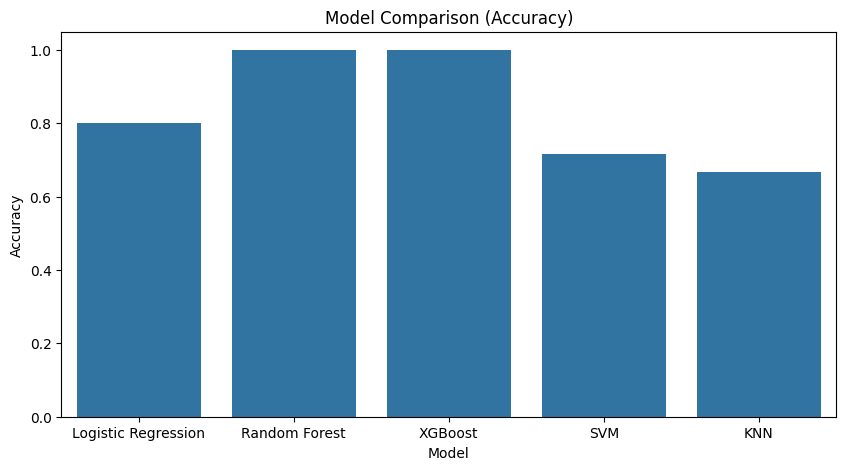

In [ ]:
# Collect accuracy scores
model_scores = {
    "Logistic Regression": lr_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc,
    "SVM": svm_acc,
    "KNN": knn_acc
}

# Plot the accuracy scores
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


In [ ]:
best_model = max(model_scores, key=model_scores.get)
print(f"Best Model: {best_model}")

# Evaluate detailed metrics for the best model
if best_model == "Logistic Regression":
    pred = lr_pred
elif best_model == "Random Forest":
    pred = rf_pred
elif best_model == "XGBoost":
    pred = xgb_pred
elif best_model == "SVM":
    pred = svm_pred
else:
    pred = knn_pred

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print("\nClassification Report:")
print(classification_report(y_test, pred))


Best Model: Random Forest
Confusion Matrix:
[[25  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        35

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Ensure y is binarized
y_binarized = label_binarize(y, classes=[0, 1])  # Modify classes as per your target variable

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Load data (replace 'your_file.csv' with your actual dataset)
file_path = "/content/cmrit.bangalore_instagram_data.csv"  # Update with your dataset's path

try:
    # Specify 'latin1' or 'ISO-8859-1' encoding to handle non-UTF-8 characters
    data = pd.read_csv(file_path, encoding='latin1')
    print("Data loaded successfully!")
    print(data.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct file path.")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Try using a different encoding like 'latin1' or 'ISO-8859-1'.")

print("All libraries loaded successfully!")


# Preprocess the data
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['caption_length'] = data['caption'].apply(len)
data['num_hashtags'] = data['hashtags'].apply(lambda x: len(x.split()))

data = data.drop(columns=['date', 'post_url','comments','shares'])

X = data.drop(columns=['likes'])
y = data['likes']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor setup for different types of features
numeric_features = ['hour', 'month', 'year', 'caption_length', 'num_hashtags']
categorical_features = ['day']  # One-hot encoding for categorical columns
text_features = ['caption', 'hashtags']

# Column transformer setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('text', TfidfVectorizer(), 'caption'),
        ('text2', TfidfVectorizer(), 'hashtags')
    ])

# Manually fit the preprocessor first
preprocessed_data = preprocessor.fit_transform(X_train)

# Train an XGBoost model directly without the pipeline
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(preprocessed_data, y_train)

# Use the model for predictions
new_data = pd.DataFrame({
    'caption': ['Department of Artificial Intelligence and Machine Learning in association with CMRIT - Institutions Innovation Council organized a Demo Day: Showcasing Innovative Projects of 3rd Semester Students on 04th December2024. @mhrd.innovationcell'],
    'hashtags': ['#cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #mhrdiic, #iic, #institution, #innovation, #council, #Department, #artificialintelligence, #machinelearning, #AI, #ML, #AIML, #DemoDay, #showcasing, #innovative, #Projects, #third, #semester, #students'],
    'hour': [16],  # Example hour feature
    'day': ['Friday'],  # Example day feature
    'month': [12],  # Example month feature
    'year': [2024],  # Example year feature
    'caption_length': [270],  # Example caption length
    'num_hashtags': [281]  # Example number of hashtags
})

# Manually preprocess new data
new_data_transformed = preprocessor.transform(new_data)

# Predict likes for the new Instagram post
predicted_likes = xgb_model.predict(new_data_transformed)

print(f"Predicted Likes for the new post: {predicted_likes[0]}")



Data loaded successfully!
               date                                            caption  \
0  06-12-2024 16:22  Department of Artificial Intelligence and Mach...   
1  06-12-2024 16:17  Codechef Club of the Department of Artificial ...   
2  05-12-2024 02:14  Department of Computer Science and Engineering...   
3  04-12-2024 12:34  Department of Electronics and Communication En...   
4  04-12-2024 11:56  Codechef Club of the Department of Artificial ...   

                                            hashtags  likes  comments  shares  \
0  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     20         0       1   
1  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     23         0       0   
2  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     14         0       2   
3  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     14         0       0   
4  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     51         0       2   

                                          

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocess the test data
X_test_transformed = preprocessor.transform(X_test)

# Predict on the test set
y_pred = xgb_model.predict(X_test_transformed)

# Calculate MSE, MAE, and R² scores
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7547.751953125
Mean Absolute Error (MAE): 46.363197326660156
R-squared (R²): 0.7313621044158936


In [ ]:
import joblib

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')

print("Model and preprocessor saved successfully!")

Model and preprocessor saved successfully!


In [ ]:
# Load the preprocessor
preprocessor_loaded = joblib.load('preprocessor.pkl')

# Load the XGBoost model
xgb_model_loaded = joblib.load('xgboost_model.pkl')

print("Model and preprocessor loaded successfully!")

Model and preprocessor loaded successfully!
